In [1]:
#Data Analysis of PUBG Player Statistics with 150 features in solo, duo, and squad plays.

In [2]:
#Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import scale 
import matplotlib
import matplotlib.cm as cm
import scipy
import tensorflow as tf
import keras

Using Theano backend.


In [3]:
# Data is a massive CSV file

data = pd.read_csv("C:\\Users\\JoonH\\Desktop\\Kaggle_data\\PUBG_Player_Statistics.csv")

In [4]:
data.describe()

,tracker_id,solo_KillDeathRatio,solo_WinRatio,solo_TimeSurvived,solo_RoundsPlayed,solo_Wins,solo_WinTop10Ratio,solo_Top10s,solo_Top10Ratio,solo_Losses,...,squad_RideDistance,squad_MoveDistance,squad_AvgWalkDistance,squad_AvgRideDistance,squad_LongestKill,squad_Heals,squad_Revives,squad_Boosts,squad_DamageDealt,squad_DBNOs
count,87898.000000,87898.000000,87898.000000,8.789800e+04,87898.000000,87898.000000,87898.000000,87898.000000,87898.000000,87898.000000,...,8.789800e+04,8.789800e+04,87898.000000,87898.000000,87898.000000,87898.000000,87898.000000,87898.000000,87898.000000,87898.000000
mean,110794.357050,1.865855,5.017506,6.971571e+04,79.275342,2.080093,0.179251,12.106282,20.667335,77.195249,...,3.163813e+05,5.968687e+05,1630.826705,1772.866887,381.417868,345.853148,39.403160,226.072345,30960.026736,201.564017
std,63648.581759,1.776301,10.077138,8.040861e+04,96.947859,3.394513,0.217444,14.694722,16.181078,95.545156,...,2.895132e+05,4.910160e+05,433.957257,803.932786,182.995324,300.328618,33.500954,204.961191,27498.941894,181.558141
min,0.000000,0.000000,0.000000,7.610000e+01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51925.250000,1.030000,0.000000,1.789705e+04,17.000000,0.000000,0.000000,4.000000,10.800000,16.000000,...,1.266086e+05,2.661650e+05,1377.460000,1226.412500,282.830000,144.000000,17.000000,91.000000,12827.937500,82.000000
50%,112705.500000,1.470000,2.000000,4.517333e+04,48.000000,1.000000,0.110000,8.000000,16.700000,46.000000,...,2.380680e+05,4.743565e+05,1592.410000,1645.455000,354.405000,266.000000,31.000000,169.000000,23608.320000,153.000000
75%,164879.750000,2.140000,5.560000,9.246264e+04,105.000000,3.000000,0.250000,15.000000,25.900000,102.000000,...,4.116721e+05,7.820437e+05,1847.200000,2177.837500,443.567500,456.000000,52.000000,295.000000,40426.240000,263.000000
max,222490.000000,100.000000,100.000000,1.521200e+06,1681.000000,106.000000,1.000000,386.000000,100.000000,1673.000000,...,4.323045e+06,6.057798e+06,47314.750000,9632.720000,4604.990000,4394.000000,417.000000,2769.000000,484492.810000,3334.000000


In [5]:
#Checking for any null or missing data
data.isnull().sum()


player_name                  0
tracker_id                   0
solo_KillDeathRatio          0
solo_WinRatio                0
solo_TimeSurvived            0
solo_RoundsPlayed            0
solo_Wins                    0
solo_WinTop10Ratio           0
solo_Top10s                  0
solo_Top10Ratio              0
solo_Losses                  0
solo_Rating                  0
solo_BestRating              0
solo_DamagePg                0
solo_HeadshotKillsPg         0
solo_HealsPg                 0
solo_KillsPg                 0
solo_MoveDistancePg          0
solo_RevivesPg               0
solo_RoadKillsPg             0
solo_TeamKillsPg             0
solo_TimeSurvivedPg          0
solo_Top10sPg                0
solo_Kills                   0
solo_Assists                 0
solo_Suicides                0
solo_TeamKills               0
solo_HeadshotKills           0
solo_HeadshotKillRatio       0
solo_VehicleDestroys         0
                            ..
squad_Top10sPg               0
squad_Ki

In [6]:
#As hoped, it seems there is no missing data in the massive dataframe (Yay!)
#Splitting data to play with

df_solo = data[['tracker_id', 'solo_WinRatio']]
df_solo

,tracker_id,solo_WinRatio
0,4405,17.65
1,8199,18.18
2,4454,0.00
3,7729,50.00
4,0,33.33
5,33313,31.25
6,15585,8.45
7,9454,26.32
8,24029,13.64
9,11289,25.00


In [7]:

#Progressing with an attempt to use PCA for data reduction

from sklearn.decomposition import PCA
PCA = PCA(n_components = 10)
data_pca = PCA.fit(data_solo)

NameError: name 'data_solo' is not defined

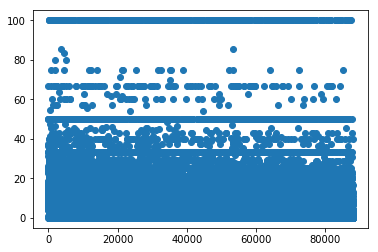

In [8]:
# Scatter Plot
plt.scatter(df_solo.index, df_solo['solo_WinRatio'])

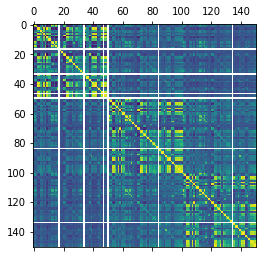

In [9]:
#CorrelationMatrix
plt.matshow(data.corr())

In [13]:
#It it shown from the correlation matrix that adjacent features often show some correlation, thus they would now be analyzed



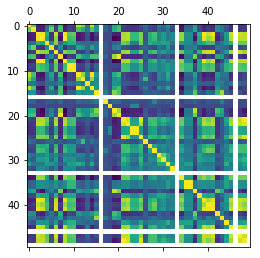

In [12]:
#Analyzing solo players stats

solo = [col for col in data.columns if 'solo' in col] #selects all columns with the name 'solo' in it
data_solo = data[solo] # new dataframe only with solo statistics
plt.matshow(data_solo.corr()) # Corrleation Matrix

In [15]:
#Now that we have some understanding of the data, let's try to build a supervised learning algorithm to predict something!
#Let's pick two features that showed close correlation.

#choosing 8th feature and 3rd feature
data_correlationOne = data_solo[['solo_TimeSurvived', 'solo_Top10Ratio']]
data_correlationOne


,solo_TimeSurvived,solo_Top10Ratio
0,18469.14,23.5
1,33014.86,33.3
2,4330.44,20.0
3,13421.82,75.0
4,9841.04,83.3
5,22003.22,62.5
6,148051.25,23.9
7,26091.14,52.6
8,49282.41,29.5
9,10280.77,50.0


In [16]:
data_correlationOne.corr()

,solo_TimeSurvived,solo_Top10Ratio
solo_TimeSurvived,1.000000,-0.205708
solo_Top10Ratio,-0.205708,1.000000


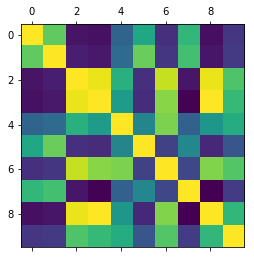

In [18]:
#Surprisngly, unlike what we expected in the correlation matrix it onlys shows a weak negative correlation of -0.2. 
#Hence we will pick a bunch more features and look into the correlation matrix again.

data_correlationTwo = data_solo[['solo_KillDeathRatio', 'solo_WinRatio', 'solo_TimeSurvived', 'solo_RoundsPlayed',
                                 'solo_Wins', 'solo_WinTop10Ratio', 'solo_Top10s', 'solo_Top10Ratio', 'solo_Losses', 
                                 'solo_Rating']]

plt.matshow(data_correlationTwo.corr())

In [19]:
#Correlation Matrix shows us that the 9th feature 'solo_Losses' and 4th feature 'solo_RoundsPlayed' shows some correlation.
#Let's find out its correlation coeffecient (Pearson).

data_correlationThree = data_solo[['solo_RoundsPlayed', 'solo_Losses']]
data_correlationThree.corr()

,solo_RoundsPlayed,solo_Losses
solo_RoundsPlayed,1.000000,0.999484
solo_Losses,0.999484,1.000000


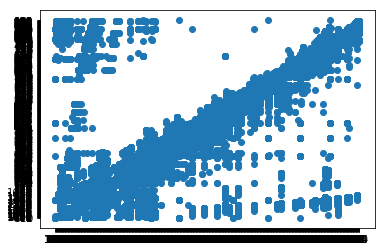

In [20]:
#As expected, the two shows an extreme positive linear correlation of 0.99
#Let's build a regression between the two.

matplotlib.pyplot.scatter(data_correlationThree[['solo_RoundsPlayed']],data_correlationThree[['solo_Losses']])
#x = rounds played, y = losses

matplotlib.pyplot.show()